# Linear regression test with age and days to recovery data.

In [51]:
# Import Relevant libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

df = pd.read_csv("heavymachine_data.csv", sep=";")
df.head()
# df.describe()


,Chassi,Hours,Model,Aplication,Age
0,b7568591-ba29-4068-b0a3-826215dd03f8,461,111,71,11
1,1025cf47-6f68-42f5-b649-2c6118e466e1,277,90,39,10
2,f6284931-a569-4528-a665-df9c4fedc543,905,87,35,10
3,91f0b87d-00e5-4e6f-9848-9eb67dc20c4d,437,87,72,10
4,55877d90-7683-4001-ae00-bd88ca1c3cab,311,90,35,10


# Separete 70% training and 30% validation data

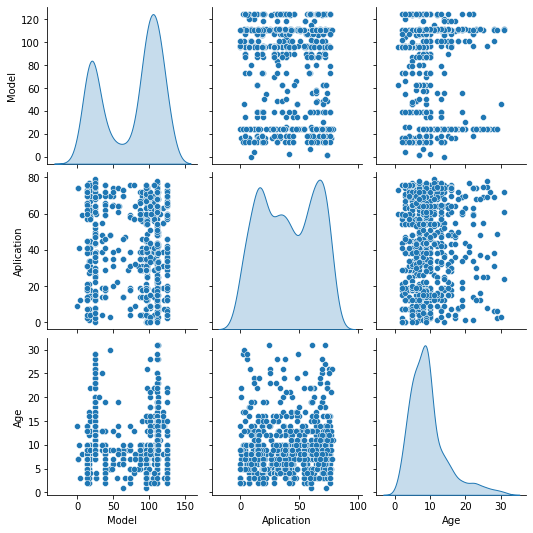

In [53]:
randomized = df.sample(frac=1).drop("Chassi", axis="columns")
size = len(df)
training_data = df[0:int(size*0.7)]
testing_data = df[int(size*0.7):size-1]
sns.pairplot(training_data[["Model","Aplication","Age"]], diag_kind="kde")

In [71]:
# a = tf.Variable([0.1,0.1])
# b = tf.Variable([0.1,0.1])
a = tf.Variable([[0.1],[0.1]])
b = tf.Variable([[0.1],[0.1]])
x = tf.Variable([0.1,0.1],[0.1,0.1],[0.1,0.1])
x = x.transpose(x)
y1 = tf.Variable([0.1,0.1])
y2 = tf.add(tf.multiply(x, a), b)
print(y2)

AttributeError: 'ResourceVariable' object has no attribute 'transpose'

In [61]:
# Learning rate
learning_rate = 0.1

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# declare weights
weight = tf.Variable([0.1,0.1,0.1])
bias = tf.Variable([0.1,0.1,0.1])

# Define linear regression expression y
def linreg(x, w, b):
    y =np.sum(w*x + b, axis=1)
    return y

# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        x_train = training_data[["Model","Aplication","Age"]]
        y_train = training_data["Hours"] 
        y_predicted = linreg(x_train, weight, bias)        
        loss = squared_error(y_predicted, y_train)
        # Get gradients
        print(loss)
        print(weight)
        print(bias)
        gradients = tape.gradient([[loss], [loss]], [weight,bias])
        # Adjust weights
        print(gradients)
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)
        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")


(806,)
tf.Tensor(993774949.3116919, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.1, 0.1, 0.1], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.1, 0.1, 0.1], dtype=float32)>
[None, None]


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

0.17648664
0.003390875


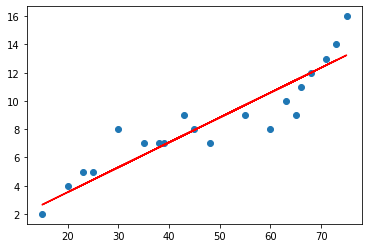

In [6]:
print(weight.numpy())
print(bias.numpy())
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()